# Kaggle Konfiguration

In [2]:
! chmod 600 /content/kaggle.json

# Import Dataset

In [3]:
! KAGGLE_CONFIG_DIR=/content kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [00:41<00:00, 62.9MB/s]
100% 3.58G/3.58G [00:41<00:00, 92.2MB/s]


In [4]:
import zipfile
zip_file = zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip', 'r')
zip_file.extractall('/tmp/')

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

In [6]:
train_path = "/tmp/dataset/train"
test_path = "/tmp/dataset/test"

In [7]:
# Preprocessing dan augmentation data latih
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(150, 150),
                                                 batch_size=32,
                                                 class_mode='sparse')

Found 10901 images belonging to 6 classes.


In [8]:
# Preprocessing data uji
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='sparse')

Found 2698 images belonging to 6 classes.


# Modelling

In [11]:
model = Sequential()
model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(6, activation="softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

# Training

In [14]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback untuk mengurangi learning rate saat validasi loss stagnan
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
# Callback untuk menghentikan pelatihan saat tidak ada peningkatan dalam validasi loss
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(training_set,
                    epochs=5,
                    verbose=1,
                    validation_data=test_set,
                    callbacks=[reduce_lr, early_stop])

Epoch 1/5
341/341 [==============================] - 60s 171ms/step - loss: 0.0381 - accuracy: 0.9866 - val_loss: 0.0753 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 2/5
341/341 [==============================] - 70s 206ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.1165 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 3/5
341/341 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9857
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
341/341 [==============================] - 60s 175ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.1023 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 4/5
341/341 [==============================] - 61s 178ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0602 - val_accuracy: 0.9830 - lr: 1.0000e-04
Epoch 5/5
341/341 [==============================] - 57s 166ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.0595 - val_accuracy: 0.9837 - lr: 1.0000e-04


In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback untuk mengurangi learning rate saat validasi loss stagnan
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
# Callback untuk menghentikan pelatihan saat tidak ada peningkatan dalam validasi loss
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(training_set,
                    epochs=5,
                    verbose=1,
                    validation_data=test_set,
                    callbacks=[reduce_lr, early_stop])

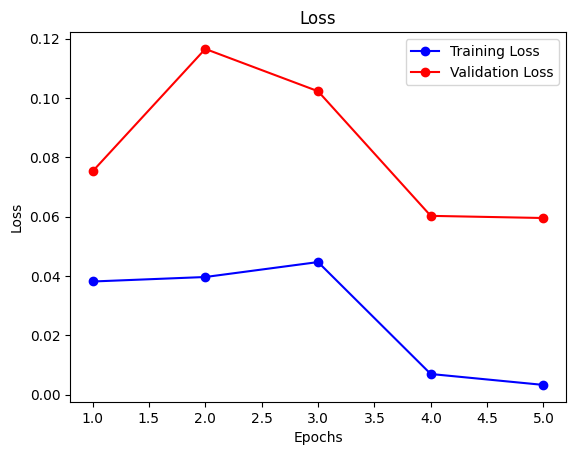

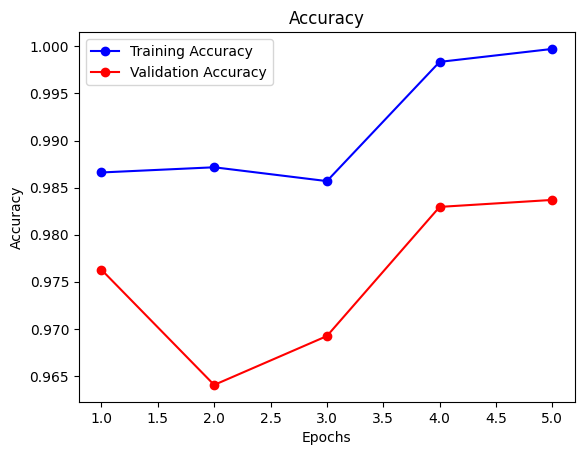

In [15]:
import matplotlib.pyplot as plt

# Mendapatkan history dari pelatihan model
history_dict = history.history

# Mengambil nilai loss dan akurasi dari set pelatihan dan validasi
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Menghitung jumlah epoch
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot akurasi
plt.plot(epochs, train_acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Saving Model

In [16]:
from google.colab import files

model.save('model_v2.1.0.h5')
files.download('model_v2.1.0.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

Saving RottenApple.jpg to RottenApple.jpg
1/1 [==============================] - 0s 203ms/step
RottenApple.jpg is a Rotten Apple


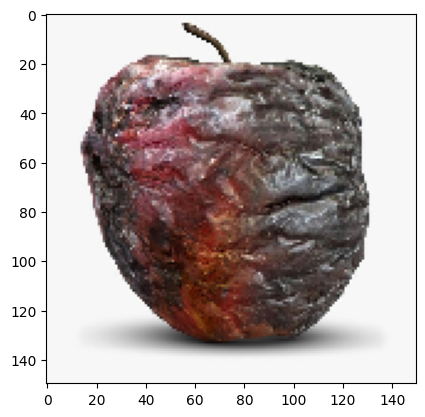

In [17]:
import numpy as np

%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)
  if arr[0][0]==1:
    labels='Fresh Apple'
  elif arr[0][1]==1:
    labels='Fresh Banana'
  elif arr[0][2]==1:
    labels='Fresh Orange'
  elif arr[0][3]==1:
    labels='Rotten Apple'
  elif arr[0][4]==1:
    labels='Rotten Banana'
  elif arr[0][5]==1:
    labels='Rotten Orange'
print('{} is a {}'.format(fn, labels))